In [1]:
from PIL import Image
import os
import numpy as np

from keras.datasets import cifar10
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D,MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU,ReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


In [2]:
originalImagePath="./image_original"
smallImagePath="./image_small"

### データセットの読み込み
---

In [3]:
#縮小モデルの生成
imageNameList=os.listdir(originalImagePath)
for imageName in imageNameList:
    img=Image.open(originalImagePath+"/"+imageName)
    img=img.resize((32,32))
    img.save(smallImagePath+"/s"+imageName)

In [4]:
datay=np.loadtxt("viewnum.txt")[:,1]

persent=98
q1,q2=np.percentile(np.log(datay),[50+persent/2,50-persent/2])
mean=np.mean(np.log(datay))

def func(x):
    datay=np.log(x)
    return (datay-mean)/(q1-q2)+0.5

def invf(x):
    datay=(x-0.5)*(q1-q2)+mean
    return np.e**datay


In [5]:
dataX=[]
dataY=[]

for imageName in imageNameList:
    img=Image.open(smallImagePath+"/s"+imageName)
    img=img.convert("RGB")
    data=np.asarray(img)#配列化
    data=data/255.0#正規化

    dataX.append(data)

dataY=func(datay)

In [6]:
# print([0]*3)

(array([103.,  39.,   8.,   5.,   1.,   0.,   1.,   0.,   0.,   0.]), array([       0.,  2000000.,  4000000.,  6000000.,  8000000., 10000000.,
       12000000., 14000000., 16000000., 18000000., 20000000.]), <a list of 10 Patch objects>)
(array([85., 49., 16.,  5.,  1.,  1.,  0.,  0.,  0.,  0.]), array([       0.,  2000000.,  4000000.,  6000000.,  8000000., 10000000.,
       12000000., 14000000., 16000000., 18000000., 20000000.]), <a list of 10 Patch objects>)
(array([53., 34., 15.,  7.,  4.,  2.,  0.,  0.,  0.,  0.]), array([       0.,  2000000.,  4000000.,  6000000.,  8000000., 10000000.,
       12000000., 14000000., 16000000., 18000000., 20000000.]), <a list of 10 Patch objects>)
(array([42., 37., 27., 10.,  3.,  2.,  1.,  1.,  0.,  0.]), array([       0.,  2000000.,  4000000.,  6000000.,  8000000., 10000000.,
       12000000., 14000000., 16000000., 18000000., 20000000.]), <a list of 10 Patch objects>)
(array([34., 53., 23., 16.,  9.,  4.,  3.,  2.,  1.,  0.]), array([       0.,  200

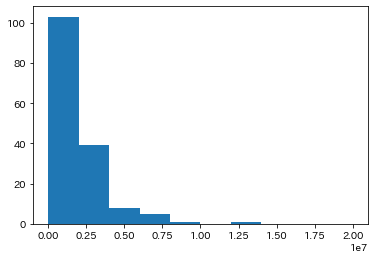

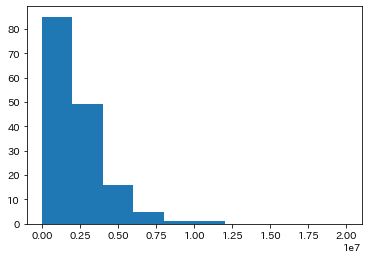

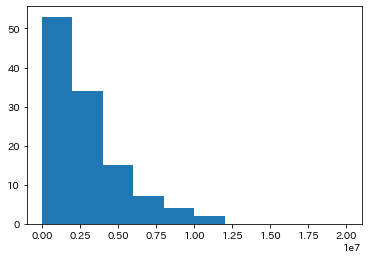

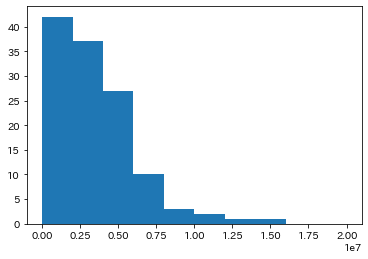

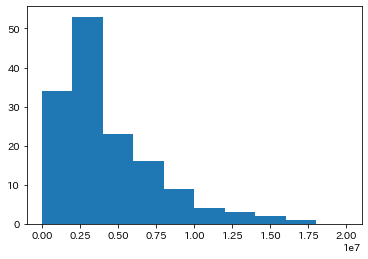

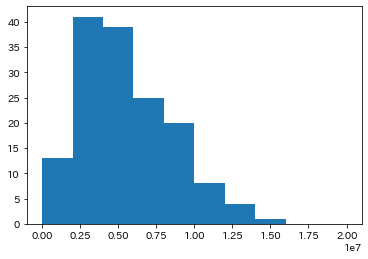

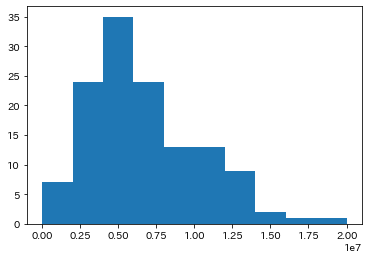

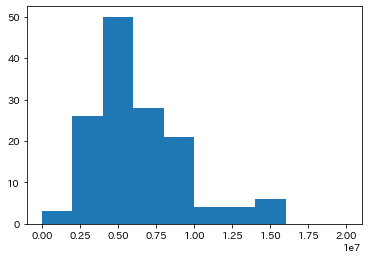

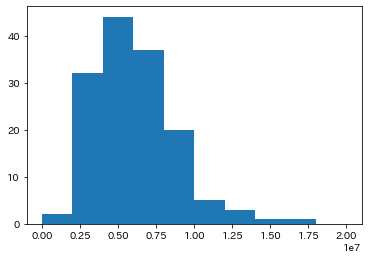

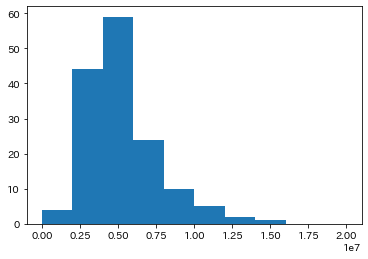

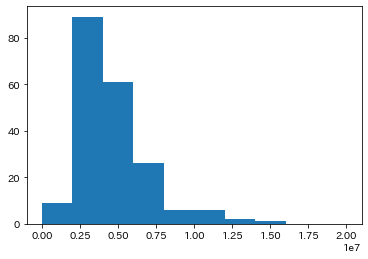

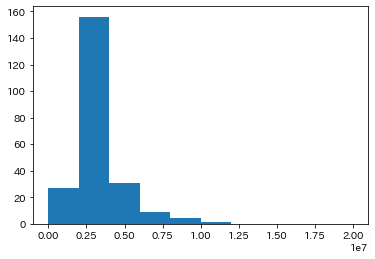

In [7]:
# data15=np.loadtxt("viewnum.txt")[0:315,1]
# data16=np.loadtxt("viewnum.txt")[315:554,1]
# data17=np.loadtxt("viewnum.txt")[554:851,1]
# data18=np.loadtxt("viewnum.txt")[851:1124,1]
# data19=np.loadtxt("viewnum.txt")[1124:1421,1]
# data20=np.loadtxt("viewnum.txt")[1421:1849,1]


HBN=3#histgramBunkatuNum

datamoto=np.loadtxt("viewnum.txt")[:,1]
# data=[
# np.loadtxt("viewnum.txt")[0:315,1]
# ,np.loadtxt("viewnum.txt")[315:554,1]
# ,np.loadtxt("viewnum.txt")[554:851,1]
# ,np.loadtxt("viewnum.txt")[851:1124,1]
# ,np.loadtxt("viewnum.txt")[1124:1421,1]
# ,np.loadtxt("viewnum.txt")[1421:1849,1]
# ]
data=[
np.loadtxt("viewnum.txt")[0:157,1]
,np.loadtxt("viewnum.txt")[157:315,1]
,np.loadtxt("viewnum.txt")[315:430,1]
,np.loadtxt("viewnum.txt")[430:554,1]
,np.loadtxt("viewnum.txt")[554:700,1]
,np.loadtxt("viewnum.txt")[700:851,1]
,np.loadtxt("viewnum.txt")[851:980,1]
,np.loadtxt("viewnum.txt")[980:1124,1]
,np.loadtxt("viewnum.txt")[1124:1270,1]
,np.loadtxt("viewnum.txt")[1270:1421,1]
,np.loadtxt("viewnum.txt")[1421:1621,1]
,np.loadtxt("viewnum.txt")[1621:1849,1]
]



def cateqcut(da):
    ls=[]
    for d in da:
        ls.append(d)
    return pd.qcut(pd.Series(ls),4,labels=False)


aanan=[]
for j in range(0,12):
    for i in cateqcut(data[j]):
        bbnbn=[0]*HBN
        if i>=2:
            i=2
        bbnbn[i]=1
        aanan.append(bbnbn)
dataY=np.array(aanan)
# print(dataY)

# plt.hist(datamoto,bins=10,range=(0,20000000))
for i in range(12):
    plt.figure().add_subplot(1,1,1)
    print(plt.hist(data[i],bins=10,range=(0,20000000)))

In [8]:
# data=np.loadtxt("viewnum.txt")[:,1]

# persent=98
# q1,q2=np.percentile(np.log(data),[50+persent/2,50-persent/2])
# mean=np.mean(np.log(data))

# def func(x):
#     data=np.log(x)
#     return (data-mean)/(q1-q2)+0.5

# def invf(x):
#     data=(x-0.5)*(q1-q2)+mean
#     return np.e**data



# plt.hist(func(data),bins=40)
# plt.hist(data,bins=100)

In [9]:
dataX=np.asarray(dataX)
dataY=np.asarray(dataY)

X_train,X_test,y_train,y_test,imageName_train,imageName_test=train_test_split(dataX,dataY,imageNameList,test_size=0.2)

ValueError: Found input variables with inconsistent numbers of samples: [1849, 1385, 1849]

### モデルの定義
---

In [ ]:
# img_shape=(32,32,3)
# optimizer = Adam(0.0002, 0.5)

# def CNN():
#     cnn=Sequential()

#     cnn.add(Conv2D(8,(3,3),input_shape=img_shape))
#     cnn.add(LeakyReLU(alpha=0.2))
#     cnn.add(BatchNormalization(momentum=0.8,axis=1))

#     cnn.add(MaxPooling2D(pool_size=(2,2)))

#     cnn.add(Conv2D(16,(3,3),input_shape=img_shape))
#     cnn.add(LeakyReLU(alpha=0.2))
#     cnn.add(BatchNormalization(momentum=0.8,axis=1))

#     cnn.add(MaxPooling2D(pool_size=(2,2)))

#     cnn.add(Conv2D(32,(3,3),input_shape=img_shape))
#     cnn.add(LeakyReLU(alpha=0.2))
#     cnn.add(BatchNormalization(momentum=0.8,axis=1))


#     cnn.add(Flatten())

#     cnn.add(Dense(HBN))

#     cnn.add(Activation("sigmoid"))

#     cnn.summary()

#     cnn.compile(loss='categorical_crossentropy',
#                 optimizer='sgd',
#                 metrics=['accuracy'])

#     return cnn
# cnn=CNN()


In [ ]:

img_shape=(32,32,3)
optimizer = Adam(0.0002, 0.5)

def CNN():
    cnn=Sequential()

    cnn.add(Conv2D(8,(2,2),strides=(1,1),input_shape=img_shape))
    cnn.add(LeakyReLU(alpha=0.2))
    cnn.add(BatchNormalization(momentum=0.8,axis=1))

    cnn.add(MaxPooling2D(pool_size=(2,2)))
    cnn.add(Dense(20))
    cnn.add(ReLU())
    cnn.add(Dropout(0.5))

    cnn.add(Flatten())


    cnn.add(Dense(HBN))

    cnn.add(Activation("softmax"))

    cnn.summary()

    cnn.compile(loss='categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

    return cnn
cnn=CNN()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 31, 8)         104       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 31, 31, 8)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 31, 8)         124       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
dense_1 (Dense)              (None, 15, 15, 20)        180       
_________________________________________________________________
re_lu_1 (ReLU)       

### 学習
___

In [ ]:
cnn.fit(X_train,y_train,epochs=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1479/1479 [==============================] - 1s 579us/step - loss: 1.1503 - acc: 0.4435
Epoch 2/100
1479/1479 [==============================] - 1s 355us/step - loss: 1.0832 - acc: 0.4665
Epoch 3/100
1479/1479 [==============================] - 1s 349us/step - loss: 1.0427 - acc: 0.4902
Epoch 4/100
1479/1479 [==============================] - 1s 347us/step - loss: 1.0224 - acc: 0.4997
Epoch 5/100
1479/1479 [==============================] - 1s 350us/step - loss: 1.0111 - acc: 0.5098
Epoch 6/100
1479/1479 [==============================] - 1s 350us/step - loss: 1.0092 - acc: 0.5071
Epoch 7/100
1479/1479 [==============================] - 1s 347us/step - loss: 0.9938 - acc: 0.5125
Epoch 8/100
1479/1479 [==============================] - 1s 358us/step - loss: 0.9911 - acc: 0.5152
Epoch 9/100
1479/1479 [==============================] - 1s 362us/step - loss: 0.9859 - acc: 0.5267
Epoch 10/100
1479/1479 [============================

### 推論

In [ ]:
# d=[]
# for i,j in zip(invf(cnn.predict(X_test)),invf(y_test)):
#     d.append(float(i/j))





# print(plt.hist(d,bins=100,range=(0,4)))

In [ ]:

# X_test
cnnX_test=cnn.predict(X_test)

In [ ]:
y_test

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]])

In [ ]:
corre=0
aan=cnnX_test.tolist()
bbn=y_test.tolist()
for i in range(len(X_test)):
    
    aan[i].index(max(aan[i]))
    
    if aan[i].index(max(aan[i])) == bbn[i].index(1):
        corre+=1
        # print(i)

print(corre,corre/len(X_test))

161 0.43513513513513513


In [ ]:
aan

[[0.00901639275252819, 0.0424748957157135, 0.9485086798667908],
 [0.03645860031247139, 0.017370641231536865, 0.9461707472801208],
 [0.06055786833167076, 0.025139138102531433, 0.9143030643463135],
 [0.08231133967638016, 0.15409106016159058, 0.7635976672172546],
 [0.0008322278736159205, 6.049639523553196e-06, 0.9991617202758789],
 [0.7003260850906372, 0.17626699805259705, 0.12340695410966873],
 [0.1772366762161255, 0.7022391557693481, 0.12052413076162338],
 [0.45615217089653015, 0.07095175236463547, 0.472896009683609],
 [0.436221718788147, 0.2408514767885208, 0.322926789522171],
 [0.1971915066242218, 0.15010994672775269, 0.6526985168457031],
 [0.13001485168933868, 0.09900546818971634, 0.770979642868042],
 [0.04408944398164749, 0.22697874903678894, 0.7289318442344666],
 [0.3608338534832001, 0.36831071972846985, 0.2708554267883301],
 [0.00024541030870750546, 0.01804158464074135, 0.9817129969596863],
 [0.02918141521513462, 0.09709413349628448, 0.8737245202064514],
 [0.6024106740951538, 0.08

In [ ]:
correall=[0]*HBN
corre0=0
corre1=0
corre2=0
# corre3=0

motoall=[0]*HBN
moto0=0
moto1=0
moto2=0
# moto3=0
for i in range(len(aan)):
    motoall[aan[i].index(max(aan[i]))]+=1
    for j in range(HBN):

        # print(aan[i].index(max(aan[i])),j)

        # if aan[i].index(max(aan[i]))==j:

            # print("#")
        
        if (aan[i].index(max(aan[i])) == bbn[i].index(1)) and (bbn[i].index(1)==j):
            correall[j]+=1

        

    # if aan[i].index(max(aan[i]))==0:
    #     moto0+=1
    # elif aan[i].index(max(aan[i]))==1:
    #     moto1+=1
    # elif aan[i].index(max(aan[i]))==2:
    #     moto2+=1
    # elif aan[i].index(max(aan[i]))==3:
    #     moto3+=1


    
    # if (aan[i].index(max(aan[i])) == bbn[i].index(1)) and (bbn[i].index(1)==0):
    #     corre0+=1
    # elif (aan[i].index(max(aan[i])) == bbn[i].index(1)) and (bbn[i].index(1)==1):
    #     corre1+=1
    # elif (aan[i].index(max(aan[i])) == bbn[i].index(1)) and (bbn[i].index(1)==2):
    #     corre2+=1
    # elif (aan[i].index(max(aan[i])) == bbn[i].index(1)) and (bbn[i].index(1)==3):
    #     corre3+=1

for i in range(HBN):
    print(str(i)+"番目"+str(correall[i]/motoall[i]),str(correall[i]),str(motoall[i]))
# print(corre,corre/len(X_test))
# print("0番目"+str(corre0/moto0))
# print("1番目"+str(corre1/moto1))
# print("2番目"+str(corre2/moto2))
# print("3番目"+str(corre3/moto3))

0番目0.32608695652173914 15 46
1番目0.22413793103448276 13 58
2番目0.5 133 266


In [ ]:
corre=0
aan=cnnX_test.tolist()
bbn=y_test.tolist()
for i in range(len(X_test)):
    
    aan[i].index(max(aan[i]))
    
    if aan[i].index(max(aan[i])) == bbn[i].index(1):
        corre+=1
        # print(i)

print(corre,corre/len(X_test))

161 0.43513513513513513


In [ ]:
cnnX_test=cnn.predict(X_train)
corre=0
aan=cnnX_test.tolist()
bbn=y_train.tolist()
for i in range(len(X_train)):
    
    aan[i].index(max(aan[i]))
    
    if aan[i].index(max(aan[i])) == bbn[i].index(1):
        corre+=1
        # print(i)

print(corre,corre/len(X_train))

1398 0.9452332657200812
